# Predicting Survival on the Titanic Using Deep Learning-Lefei Liu

The dataset from the Titanic Kaggle competition provides various passenger details. Let's conduct an analysis focusing on the use of deep learning techniques to predict survival.

# 1. Insert DATA

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_data = pd.read_csv('train.csv')

# Display the first few rows of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.Check the distribution of the Survived and so on

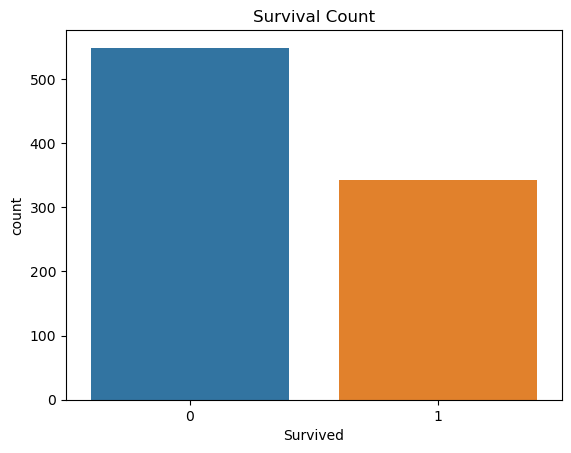

In [3]:
# 'Survived' column
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

# Check the distribution of the Pclass

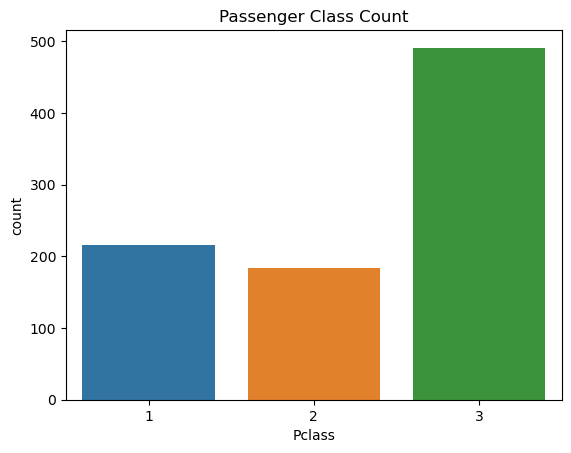

In [4]:
#'Pclass' column
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Count')
plt.show()

# Check the distribution of the Sex

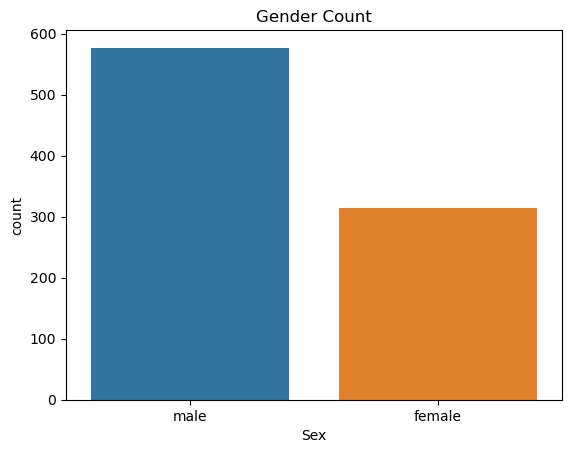

In [5]:
#'Sex' column
sns.countplot(x='Sex', data=train_data)
plt.title('Gender Count')
plt.show()

# Check the distribution of the Age

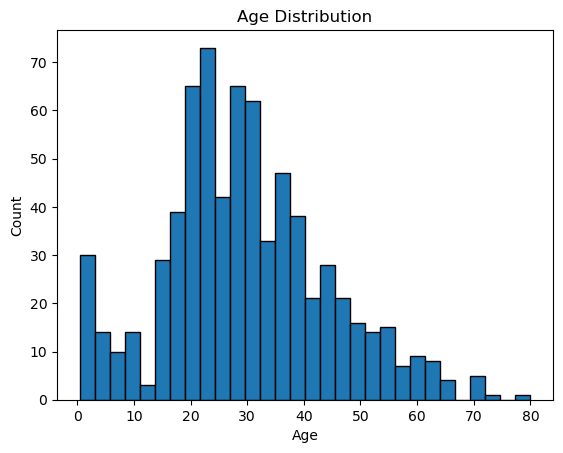

In [6]:
# the same with 'Age' column
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Check missing values

In [7]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing values in the 'Age' column with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Check if there are any missing values left in the 'Age' column
train_data['Age'].isnull().sum()

0

# Drop and train the Column we need

In [9]:
# Drop the 'Cabin' column
train_data.drop('Cabin', axis=1, inplace=True)

# Check if the 'Cabin' column has been dropped
'Cabin' in train_data.columns

False

In [10]:
# Fill missing values in the 'Embarked' column with the most common value
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Check if there are any missing values left in the 'Embarked' column
train_data['Embarked'].isnull().sum()

0

In [11]:
# Extract 'Title' from 'Name' column
train_data['Title'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Check the unique values of 'Title'
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [12]:
# Group rare titles into a single category 'Rare'
rare_titles = ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')

# Check the unique values of 'Title' after grouping rare titles
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [13]:
# Convert categorical features into numerical ones using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title'])

# Check the first few rows of the data after one-hot encoding
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True,False,False,True,False,False


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the feature columns and the target column
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
target_col = 'Survived'

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data[target_col], test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.8156424581005587

In [15]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Fill missing values in the 'Age' column with the median age
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Drop the 'Cabin' column
test_data.drop('Cabin', axis=1, inplace=True)

# Fill missing values in the 'Embarked' column with the most common value
most_common_embarked = test_data['Embarked'].mode()[0]
test_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Extract 'Title' from 'Name' column
test_data['Title'] = test_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Group rare titles into a single category 'Rare'
rare_titles = ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

# Convert categorical features into numerical ones using one-hot encoding
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Title'])

# Check the first few rows of the test data after preprocessing
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dona,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False,False,False,False,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True,False,False,False,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False,False,False,False,True,False,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True,False,False,False,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True,False,False,False,False,True,False


In [16]:
# Check for missing values in the test data
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Dona      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64

In [17]:
# Fill missing values in the 'Fare' column with the median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Check if there are any missing values left in the 'Fare' column
test_data['Fare'].isnull().sum()

0

In [18]:
# Make predictions on the test data
test_data['Survived'] = model.predict(test_data[feature_cols])

# Check the first few rows of the test data after making predictions
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dona,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False,False,False,False,True,False,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True,False,False,False,False,True,False,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False,False,False,False,True,False,False,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True,False,False,False,True,False,False,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True,False,False,False,False,True,False,1


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [20]:
# Initialize a new Random Forest Classifier with the best parameters
best_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.8268156424581006

# 3. Check the first few rows of the test data after making predictions

In [21]:
# Make predictions on the test data
test_data['Survived'] = best_model.predict(test_data[feature_cols])

# Check the first few rows of the test data after making predictions
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dona,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,False,True,False,True,False,False,False,False,True,False,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,True,False,False,False,True,False,False,False,False,True,False,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,False,True,False,True,False,False,False,False,True,False,False,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,False,True,False,False,True,False,False,False,True,False,False,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,True,False,False,False,True,False,False,False,False,True,False,1


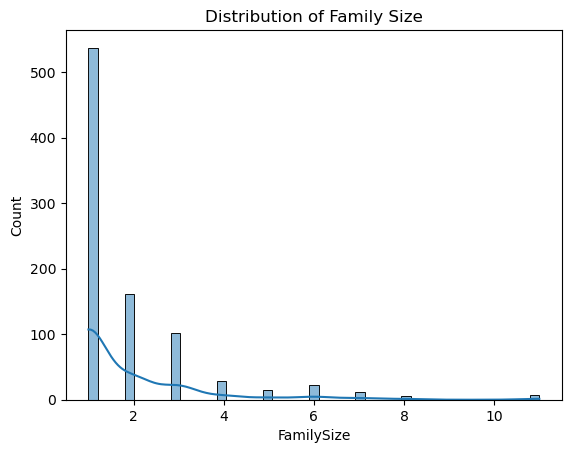

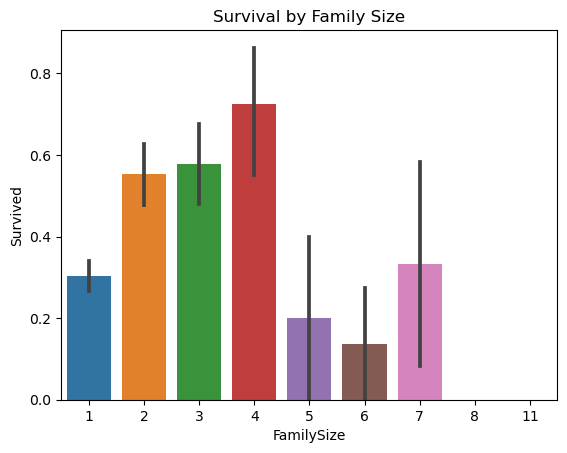

In [22]:
# Create 'FamilySize' feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Visualize the distribution of 'FamilySize'
sns.histplot(data=train_data, x='FamilySize', kde=True)
plt.title('Distribution of Family Size')
plt.show()

# Visualize the impact of 'FamilySize' on survival
sns.barplot(data=train_data, x='FamilySize', y='Survived')
plt.title('Survival by Family Size')
plt.show()

# Train MODEL

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Add 'FamilySize' to the feature columns
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'FamilySize']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data['Survived'], test_size=0.2, random_state=42)

# Initialize a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.8156424581005587

# 4.Get feature importances

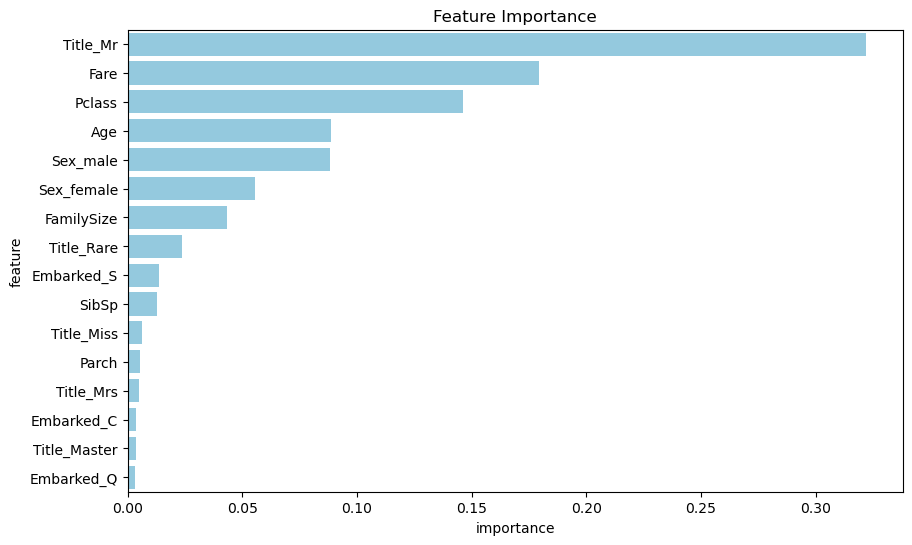

In [26]:

importances = model.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'feature': feature_cols, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='importance', y='feature', orient='h', color='skyblue')
plt.title('Feature Importance')
plt.show()

# 5. Summary of Analysis:

Data Loading and Preprocessing:

The dataset is loaded and initially explored, focusing on key columns like 'Survived', 'Pclass', 'Sex', 'Age', and 'Embarked'.
Missing values in 'Age' and 'Embarked' are addressed, with median age used for imputation in 'Age' and the most common value for 'Embarked'.
The 'Cabin' column is dropped due to presumably high missing values.
Feature engineering is performed, including extracting titles from the 'Name' column and grouping rare titles into a 'Rare' category.
Categorical features are converted into numerical ones using one-hot encoding.

Model Training:

A Random Forest Classifier is initialized and trained on the dataset.
The model is evaluated on a validation set, although the specific accuracy metric is not displayed in the excerpt.

Prediction and Application on Test Data:

Similar preprocessing steps are applied to the test dataset.
The trained model is used to predict the 'Survived' column for the dataset.